In [1]:
# Import dependencies
import pandas as pd
from matplotlib import pyplot as plt
from splinter import Browser
from selenium import webdriver
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Navigate to the website - Automated browsing
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
mars_temp_soup = soup(html, 'html.parser')

[WDM] - Downloading: 100%|██████████| 6.29M/6.29M [00:01<00:00, 3.61MB/s]


In [3]:
# Scrape header
header_elem = mars_temp_soup.find_all('th')

header_row = []

for element in header_elem:
    header = element.text
    header_row.append(header)

header_row

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [4]:
# Scrape data rows
data_row = []
data_part = mars_temp_soup.find_all('tr', class_='data-row')

for row in data_part:
    data_elem = row.find_all('td')
    for element in data_elem:
        data = element.text.strip()
        data_row.append(data)

In [5]:
# Assemble the scraped data into a Pandas DataFrame
mars_temp_data = []
header_len = len(header_row)

for i in range(0, len(data_row), header_len):
    mars_temp_data.append(data_row[i:i + header_len])

mars_temp_df = pd.DataFrame(mars_temp_data, columns=header_row)
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
# Close automated browsing session 
browser.quit()

In [7]:
# Check data types of DataFrame columns
mars_temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [8]:
# Change data types of DataFrame columns
mars_temp_df['id']=mars_temp_df['id'].astype('int64')
mars_temp_df['terrestrial_date']=pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df['sol']=mars_temp_df['sol'].astype('int64')
mars_temp_df['ls']=mars_temp_df['ls'].astype('int64')
mars_temp_df['month']=mars_temp_df['month'].astype('int64')
mars_temp_df['min_temp']=mars_temp_df['min_temp'].astype(float)
mars_temp_df['pressure']=mars_temp_df['pressure'].astype(float)

# Check data types of DataFrame columns
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


# Months exist on Mars

In [9]:
mars_no_of_months = mars_temp_df['month'].nunique()
print(f'Mars has ', mars_no_of_months, 'months.')

Mars has  12 months.


# Martian days worth of data exist in the scraped dataset

In [37]:
start_day = mars_temp_df['sol'].min()
end_day = mars_temp_df['sol'].max()
unique_days=mars_temp_df['sol'].nunique()
martian_days_count = end_day - start_day
print(f'One would think that there are', martian_days_count, 'Martian days worth of data in the dataset as they Start at day', start_day, 'and end at day', end_day, 
      '. However, a closure look at the scraped data confirms that data was not captured for some days in a month. To address that,   all the unique days(sol) were pulled from the scraped dataset and the count turned out to be', unique_days,'days.')

One would think that there are 1967 Martian days worth of data in the dataset as they Start at day 10 and end at day 1977 . However, a closure look at the scraped data confirms that data was not captured for some days in a month. To address that,   all the unique days(sol) were pulled from the scraped dataset and the count turned out to be 1867 days.


# Coldest and the warmest months on Mars (at the location of Curiosity)

In [11]:
# Iterating through the data to find the average minimum temperature for each Martian month
month_avg_min_temp = []

for i in range(1,mars_no_of_months + 1):
    temp_month_min = {"month":"","avg_min_temp":""}
    avg_min_temp = mars_temp_df.loc[mars_temp_df['month'] == i]['min_temp'].mean()
    round_avg_min_temp = round(avg_min_temp,0)
    temp_month_min["month"] = i
    temp_month_min["avg_min_temp"] = round_avg_min_temp
    month_avg_min_temp.append(temp_month_min)    
        
print(month_avg_min_temp)      

[{'month': 1, 'avg_min_temp': -77.0}, {'month': 2, 'avg_min_temp': -80.0}, {'month': 3, 'avg_min_temp': -83.0}, {'month': 4, 'avg_min_temp': -83.0}, {'month': 5, 'avg_min_temp': -79.0}, {'month': 6, 'avg_min_temp': -75.0}, {'month': 7, 'avg_min_temp': -72.0}, {'month': 8, 'avg_min_temp': -68.0}, {'month': 9, 'avg_min_temp': -69.0}, {'month': 10, 'avg_min_temp': -72.0}, {'month': 11, 'avg_min_temp': -72.0}, {'month': 12, 'avg_min_temp': -74.0}]


In [12]:
# Export Python list to JSON file
import json
json_month_avg_min_temp = json.dumps(month_avg_min_temp)

# load json to a df
month_avg_min_temp_df = pd.read_json(json_month_avg_min_temp)
month_avg_min_temp_df

,month,avg_min_temp
0,1,-77
1,2,-80
2,3,-83
3,4,-83
4,5,-79
5,6,-75
6,7,-72
7,8,-68
8,9,-69
9,10,-72


Text(0.5, 1.0, 'Avergae Minimum Temperature by Month')

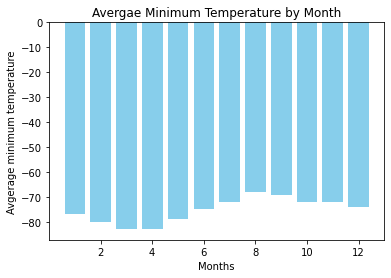

In [13]:
# Plot avgerage minimum temperature by month
plt.bar(month_avg_min_temp_df['month'], month_avg_min_temp_df['avg_min_temp'], color ='skyblue')

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Avgerage minimum temperature")

# Create title 
plt.title('Avergae Minimum Temperature by Month')

## Coldest month

In [14]:
# Find months with minimum average temperature 
avg_temp_min = month_avg_min_temp_df['avg_min_temp'].min()
min_temp_month = month_avg_min_temp_df.loc[month_avg_min_temp_df['avg_min_temp'] == avg_temp_min]
min_temp_month

,month,avg_min_temp
2,3,-83
3,4,-83


## Warmest month

In [15]:
# Find months with maximum average temperature 
avg_temp_max = month_avg_min_temp_df['avg_min_temp'].max()
max_temp_month = month_avg_min_temp_df.loc[month_avg_min_temp_df['avg_min_temp'] == avg_temp_max]
max_temp_month

,month,avg_min_temp
7,8,-68


# Months with lowest and the highest atmospheric pressure on Mars

In [16]:
# Grouping by month for average pressure
pressure_month_df = mars_temp_df[['month', 'pressure']].copy()
avg_pressure_by_month_df = pressure_month_df.groupby(['month']).mean()
avg_pressure_by_month_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [17]:
# Month with lowest atomspheric pressure
avg_pressure_min = avg_pressure_by_month_df['pressure'].min()
min_pressure_month = avg_pressure_by_month_df.loc[avg_pressure_by_month_df['pressure'] == avg_pressure_min]
min_pressure_month

,pressure
month,
6,745.054422


In [18]:
# Month with highest atomspheric pressure
avg_pressure_max = avg_pressure_by_month_df['pressure'].max()
max_pressure_month = avg_pressure_by_month_df.loc[avg_pressure_by_month_df['pressure'] == avg_pressure_max]
max_pressure_month

,pressure
month,
9,913.30597


In [19]:
avg_pressure_by_month_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


Text(0.5, 1.0, 'Avergae Pressure by Month')

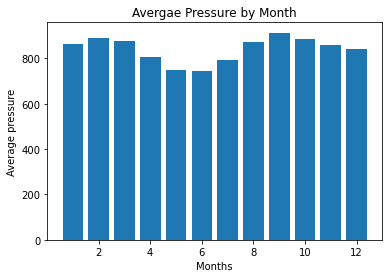

In [20]:
# Plot bar chat from avg_pressure_by_month_df
x = range(1,13)
plt.bar(x, avg_pressure_by_month_df['pressure'])

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Average pressure")

# Create title 
plt.title('Avergae Pressure by Month')

# Terrestrial (Earth) days exist in a Martian year 

In [22]:
# The solar longitude denotes the position of Mars in its orbit, running from Ls 0° to 360°. Starting from any solar longitude
# it will take 1 martian year to reach the same solar longitude.   

# Find the very first Solar Longitude (ls) in the scarpped dataset
first_ls = mars_temp_df['ls'].loc[0]

# Select all records from the mars_temp_df matching first_ls value
matching_ls = mars_temp_df.loc[mars_temp_df['ls'] == first_ls]
matching_ls

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [25]:
# Calculate terrestrial(earth) days
tot_terr_days = matching_ls['terrestrial_date'].iloc[1] - matching_ls['terrestrial_date'].loc[0]
tot_terr_days

Timedelta('686 days 00:00:00')

Text(0.5, 1.0, 'Daily Minimum Temperature')

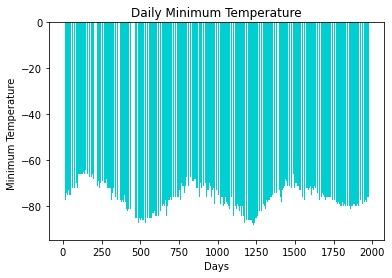

In [33]:
# Plot bar chart for daily minimum temperature vs martian days 
plt.bar(mars_temp_df['sol'], mars_temp_df['min_temp'], color = 'darkturquoise')

# Create labels for the x and y axes.
plt.xlabel("Days")
plt.ylabel("Minimum Temperature ")

# Create title 
plt.title('Daily Minimum Temperature')

# Export the DataFrame to a CSV file

In [30]:
# Export the DataFrame to a CSV file
mars_temp_df.to_csv('mars_temp_data.csv',index=False)